In [7]:
import requests
import pandas as pd

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <title>Notion</title>
    <style type="text/css">*{box-sizing:border-box}html{margin:0;padding:0}body{-webkit-font-smoothing:auto;align-items:center;background:#fffefc;color:#37352f;display:flex;flex-direction:column;font-family:-apple-system,BlinkMacSystemFont,Segoe UI,Helvetica,Apple Color Emoji,Arial,sans-serif,Segoe UI Emoji,Segoe UI Symbol;height:100vh;justify-content:center;justify-content:space-between;line-height:1.5;margin:0;padding:40px 20px;text-align:center}.top{height:40px}.details{align-items:flex-end;display:flex;font-size:13px;min-height:100px}.details h1{color:#999;display:inline-block;font-size:13px;margin:0 .75em}.details p{display:none}.details ul{color:#999;display:inline-block;margin:0;padding:0}.details li{display:inline-block;list-style:none;margin:0 .75em}.show-details-toggle{color:#999}.main{padding-bottom:20px}.main a{color:#37352f}a:hover{color:#e03e3e}@media screen and (max-width:960px){body{pad
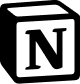

In [2]:
url = "https://www.notion.so/8f44d9f375a14afcaab1e220378a3c62?v=a5399df344284f31b8925ca9168dc5d4"

payload = {"page_size": 100}
headers = {
    "Accept": "application/json",
    "Notion-Version": "2022-02-22",
    "Content-Type": "application/json"
}

response = requests.post(url, json=payload, headers=headers)

print(response.text)

In [3]:
import json
import requests
token = ""
database_id = ""

In [4]:
def mapNotionResultToMovie(result):
  # you can print result here and check the format of the answer.
    movie_id = result['id']
    properties = result['properties']
    #print(result)
    Sleep = properties['😴7+ hrs Sleep']['checkbox']
    Journaling = properties['✍🏼Journaling']['checkbox']
    Coden = properties['Coden']['checkbox']
    dehnen = properties['Dehnen']['checkbox']
    Training = properties['Training']['checkbox']
    SAVERS = properties['SAVERS']['checkbox']
    # check for none
    if properties['Date']['date'] != None:
        Date = properties['Date']['date']['start']
    else:
        Date = properties['Date']['date']#['start']
    return {
    'Date': Date,
    'Sleep': Sleep,
    'Journaling': Journaling,
    'Coden': Coden,
    'dehnen': dehnen,
    "Training": Training,
    "SAVERS": SAVERS
    }

In [5]:
def getMovies():
    url = f'https://api.notion.com/v1/databases/{database_id}/query'

    r = requests.post(url, headers={
    "Authorization": f"Bearer {token}",
    "Notion-Version": "2021-08-16"
  })

    result_dict = r.json()
    movie_list_result = result_dict['results']

    movies = []

    for movie in movie_list_result:

        movie_dict = mapNotionResultToMovie(movie)
        movies.append(movie_dict)

    return movies

In [8]:
habits = getMovies()
habits = [habit for habit in habits if habit['Date']!=None]
df = pd.DataFrame(habits)

In [9]:
import seaborn as sns

In [10]:
for col in ['Sleep', 'Journaling', 'Coden', 'dehnen','Training','SAVERS']:
    df[col] = df[col].astype('int')

<AxesSubplot:xlabel='Date'>

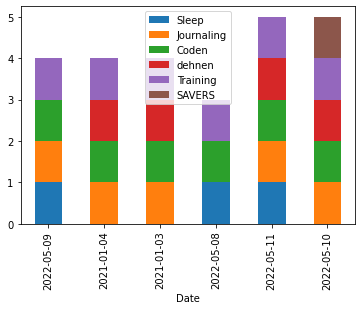

In [11]:
df.set_index('Date').plot(kind='bar', stacked=True)

In [15]:
df.head()

,Date,Sleep,Journaling,Coden,dehnen,Training,SAVERS
0,2022-05-09,1,1,1,0,1,0
1,2021-01-04,0,1,1,1,1,0
2,2021-01-03,0,1,1,1,1,0
3,2022-05-08,1,0,1,0,1,0
4,2022-05-11,1,1,1,1,1,0


In [24]:
for index, row in df.iterrows():
    df.loc[index,'count'] = int(row['Sleep'])+int(row['Journaling'])+ int(row['Coden'])+ int(row['dehnen'])+int(row['Training'])+int(row['SAVERS'])


In [30]:
df.Date

0    2022-05-09
1    2021-01-04
2    2021-01-03
3    2022-05-08
4    2022-05-11
5    2022-05-10
Name: Date, dtype: object

<BarContainer object of 6 artists>

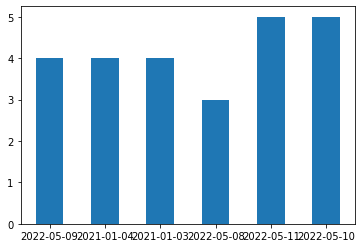

In [34]:
import matplotlib.pyplot as plt
plt.bar(df.Date.values, df['count'].values,width=0.5)